1.

In [ ]:
pip install hmmlearn

In [ ]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow", 
    "purple", "orange", "pink", "cyan", 
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv', header=None)
grid_culori = df.to_numpy()

#print(grid_culori)

# Generarea secvenței de culori observate
observatii = ["red", "red", "lime", "yellow", "blue"]

#print(observatii)
# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]
#print(observatii_idx)
# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))

for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    #print(vecini_valizi)

    prob_vecin = 0.75/len(vecini_valizi)
    transitions[i*10+j][i*10+j] = 0.25 # sansa sa ramana pe loc
    #print(prob_vecin)
    for v in vecini_valizi:
        transitions[i*10 + j][v] = prob_vecin
    ## acum am o matrice cu sansele ca agentul si sa plece din casuta


# Matrice de emisie
emissions = np.zeros((numar_stari, len(culori)))
for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < 10 and 0 <= y < 10]
    print(vecini_valizi)
    #ar trebui sa pun culorile aici in emissions
  
# Modelul HMM

model = hmm.CategoricalHMM(n_components=100)
model.startprob_ = 1/100
model.transmat_ = transitions
#model.emissionprob_ = emissions

######

# Rulăm algoritmul Viterbi pentru secvența de observații
######

# Convertim secvența de stări în poziții din grid
#drum = [idx_to_stare[idx] for idx in secventa_stari]

# Vizualizăm drumul pe grid
#fig, ax = plt.subplots(figsize=(8, 8))
#for i in range(dimensiune_grid[0]):
#    for j in range(dimensiune_grid[1]):
#        culoare = grid_culori[i, j]
#        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
#        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
#                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
#for idx, (i, j) in enumerate(drum):
#    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
#    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
#            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
#ax.set_xlim(0, dimensiune_grid[1])
#ax.set_ylim(0, dimensiune_grid[0])
#ax.set_xticks(range(dimensiune_grid[1]))
#ax.set_yticks(range(dimensiune_grid[0]))
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.grid(visible=True, color="black", linewidth=0.5)
#ax.set_aspect("equal")
#plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
#plt.show()

[10, 1]
[11, 0, 2]
[12, 1, 3]
[13, 2, 4]
[14, 3, 5]
[15, 4, 6]
[16, 5, 7]
[17, 6, 8]
[18, 7, 9]
[19, 8]
[0, 20, 11]
[1, 21, 10, 12]
[2, 22, 11, 13]
[3, 23, 12, 14]
[4, 24, 13, 15]
[5, 25, 14, 16]
[6, 26, 15, 17]
[7, 27, 16, 18]
[8, 28, 17, 19]
[9, 29, 18]
[10, 30, 21]
[11, 31, 20, 22]
[12, 32, 21, 23]
[13, 33, 22, 24]
[14, 34, 23, 25]
[15, 35, 24, 26]
[16, 36, 25, 27]
[17, 37, 26, 28]
[18, 38, 27, 29]
[19, 39, 28]
[20, 40, 31]
[21, 41, 30, 32]
[22, 42, 31, 33]
[23, 43, 32, 34]
[24, 44, 33, 35]
[25, 45, 34, 36]
[26, 46, 35, 37]
[27, 47, 36, 38]
[28, 48, 37, 39]
[29, 49, 38]
[30, 50, 41]
[31, 51, 40, 42]
[32, 52, 41, 43]
[33, 53, 42, 44]
[34, 54, 43, 45]
[35, 55, 44, 46]
[36, 56, 45, 47]
[37, 57, 46, 48]
[38, 58, 47, 49]
[39, 59, 48]
[40, 60, 51]
[41, 61, 50, 52]
[42, 62, 51, 53]
[43, 63, 52, 54]
[44, 64, 53, 55]
[45, 65, 54, 56]
[46, 66, 55, 57]
[47, 67, 56, 58]
[48, 68, 57, 59]
[49, 69, 58]
[50, 70, 61]
[51, 71, 60, 62]
[52, 72, 61, 63]
[53, 73, 62, 64]
[54, 74, 63, 65]
[55, 75, 64, 66

NameError: name 'transition_probability' is not defined

3. 1.

INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:NUTS: [p]


Output()

INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 14 seconds.


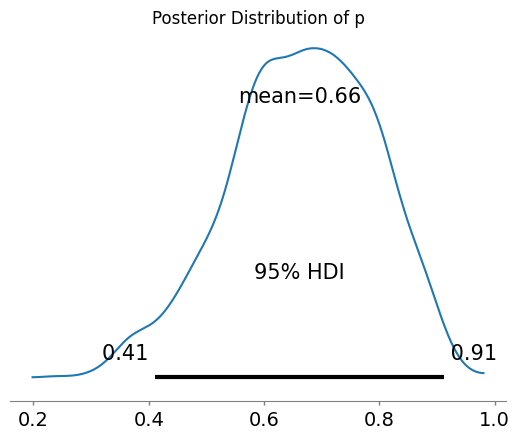

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.663  0.132    0.43    0.909      0.004    0.003     889.0     969.0   

   r_hat  
p    1.0  


In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

observed_data = [0, 1, 1, 1, 0, 1, 0, 1, 1, 1] # s = 0, b = 1
# mean este 7/10

with pm.Model() as model:

    alpha = 1
    beta = 1
    p = pm.Beta("p", alpha=alpha, beta=)
    
    likelihood = pm.Bernoulli("likelihood", p=p, observed=observed_data)

    trace = pm.sample(500, return_inferencedata=True)

az.plot_posterior(trace, var_names=["p"], hdi_prob=0.95)
plt.title("Posterior Distribution of p")
plt.show()

summary = az.summary(trace, var_names=["p"])
print(summary)


3. 2. a) Beta uniforma nu este tot Alpha = 1, Beta = 1?

3. 2. b)

INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:NUTS: [mu, sigma]


Output()

INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 17 seconds.


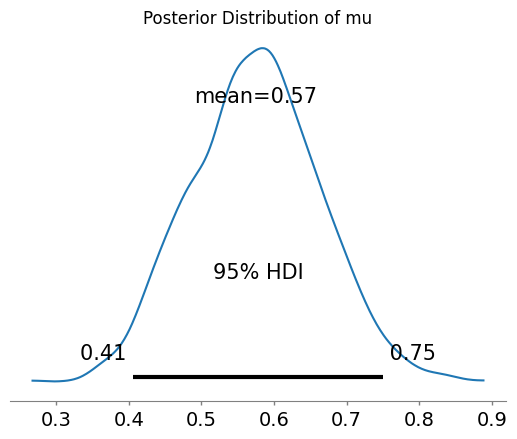

     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu  0.574  0.091   0.406    0.736      0.002    0.001    2272.0    1603.0   

    r_hat  
mu    1.0  


In [24]:
new_observed_data = [0, 0, 1, 0, 1, 1, 0, 1, 1, 0]

with pm.Model() as model3:

    #mu = 0.663
    #sigma = 0.132
    mu = pm.Normal("mu", mu=0.66, sigma=0.132)
    sigma = pm.HalfNormal("sigma", sigma=0.132)

    #alpha = 1
    #beta = 1
    #p = pm.Beta("p", alpha=alpha, beta=beta)
    
    #likelihood = pm.Bernoulli("likelihood", p=p, observed=observed_data)
    likelihood = pm.Normal("likelihood", mu=mu, sigma=sigma, observed=new_observed_data)

    trace = pm.sample(500, return_inferencedata=True)

az.plot_posterior(trace, var_names=["mu"], hdi_prob=0.95)
plt.title("Posterior Distribution of mu")
plt.show()

summary = az.summary(trace, var_names=["mu"])
print(summary)

Fata de ce a aparut la 3.1, observam ca media a mai scazut, deviatia standard a mai scazut si ca HDI este mai restrans (valorile din interval sunt mai aproape de medie)